In [3]:
try:
    import pyscancf as pcf
except ImportError:
    !pip install pyscancf
    import pyscancf as pcf
import warnings
warnings.filterwarnings("ignore")

In [4]:
inp = "IMD_dual_data/"
out = "IMD_dual_data/polar/"

1. **if you're using Jupyter Notebook, press <code>shift+tab</code> in the pyscancf.cfrad() function to view the required arguments**
2. or you can check using the method mention below
><code>pyscancf.cfrad?</code>
3. Or you can also use 
<code>help(pyscancf.cfrad)</code>

In [5]:
pcf.cfrad(input_dir=inp, output_dir=out, dualpol=True, gridder=False)

Number of files:  10
Total number of files will be created:  1
Merging all scans in one file
Data merging done 
Total Time Elapsed:  0:00:45.180653


**Now that the data has been converted to cfradial format, lets have a look into the directory**

In [8]:
!ls IMD_dual_data/*.nc
!ls IMD_dual_data/polar

IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep1.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep10.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep2.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep3.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep4.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep5.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep6.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep7.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep8.nc
IMD_dual_data/T_HAHA00_C_DEMS_20190606000229_RAWsweep9.nc
polar_T_HAHA00_C_DEMS_20190606000229_RAWsweep1.nc


Now we have the converted data file, you can read that file using pyart or wradlib or xradar

In [10]:
# Let's try with pyart
import pyart

In [12]:
radar = pyart.io.read("IMD_dual_data/polar/polar_T_HAHA00_C_DEMS_20190606000229_RAWsweep1.nc")

In [13]:
radar.fields.keys()

dict_keys(['REF', 'VELH', 'WIDTH', 'ZDR', 'KDP', 'PHIDP', 'SQI', 'RHOHV', 'HCLASS'])

Now we have all the moments including dual-pol variables as well. 

Let's convert these files to grid

In [22]:
help(pcf.get_grid)

Help on function get_grid in module pyscancf.pyscancf:

get_grid(radar, grid_shape=(30, 500, 500), height=15, length=250)
    Returns grid object from radar object.
    grid_shape=(60, 500, 500), no. of bins of z,y,x respectively.
    height:(int) = 15, height in km
    length:(int) = 250, horizontal length in km



In [23]:
grid = pcf.get_grid(radar, grid_shape=(40, 500, 500), height=20, length=250)

In [24]:
xgrid = grid.to_xarray()

In [25]:
xgrid

<xarray.Dataset>
Dimensions:  (time: 1, z: 40, y: 500, x: 500)
Coordinates:
  * time     (time) object 2019-06-06 00:02:52
  * z        (z) float64 253.0 759.3 1.266e+03 ... 1.899e+04 1.949e+04 2e+04
    lat      (y) float64 26.32 26.33 26.34 26.35 ... 30.79 30.79 30.8 30.81
    lon      (x) float64 74.71 74.72 74.73 74.74 ... 79.7 79.71 79.72 79.73
  * y        (y) float64 -2.5e+05 -2.49e+05 -2.48e+05 ... 2.49e+05 2.5e+05
  * x        (x) float64 -2.5e+05 -2.49e+05 -2.48e+05 ... 2.49e+05 2.5e+05
Data variables:
    REF      (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    VELH     (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    WIDTH    (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    ZDR      (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    KDP      (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    PHIDP    (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    SQI      (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    RHOHV    (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    HCLASS   (time, z, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    ROI      (time, z, y, x) float32 9.271e+03 9.252e+03 ... 1.024e+04 1.026e+04

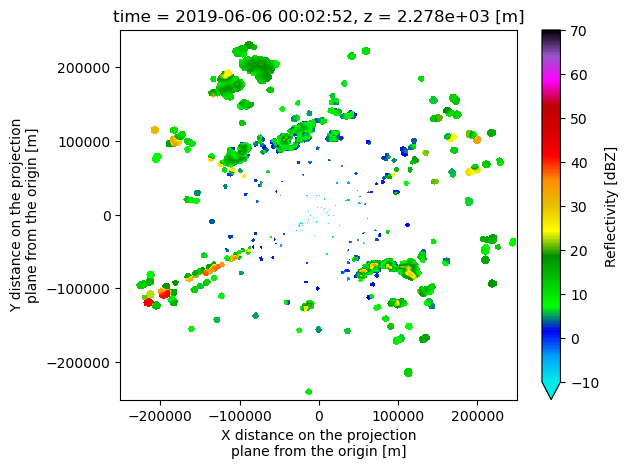

In [32]:
xgrid.REF[0].sel(z=2500, method = "nearest").plot(vmin = -10, vmax = 70, cmap = "pyart_NWSRef")

In [ ]:
If you have a large data sets and 